**Import libraries for analysis, set parameters for plotting and arrays output.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')
np.set_printoptions(suppress = True)
%matplotlib inline

**Load data.**

In [5]:
data = pd.read_csv('creditcard_2023.csv')
print(f'Data shape: {data.shape}')

Data shape: (568630, 31)


In [6]:
display(data.head())

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

__Explority Data Analysis.__

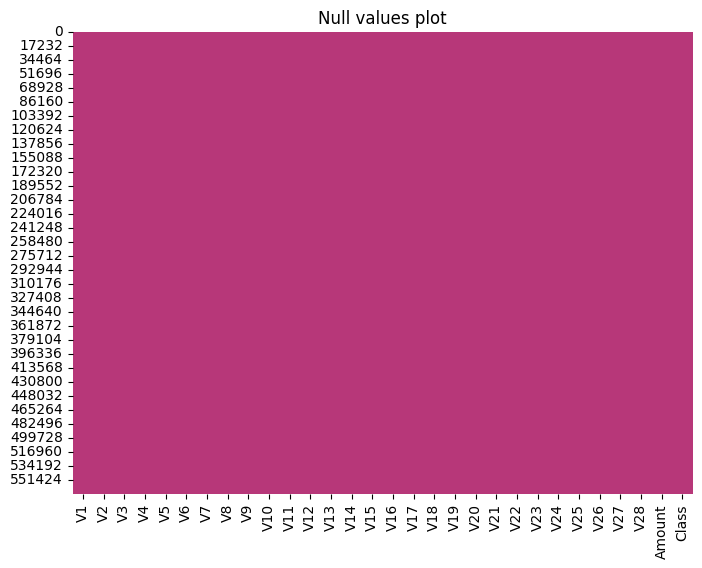

In [93]:
# for first lets check are there null values for sure
plt.figure(figsize = (8,6))
sns.heatmap(data = data.isnull(), cmap = 'magma', vmin = -1, vmax = 1, cbar = False)
plt.title('Null values plot')
plt.show();

In [10]:
# no null values in whole dataset
# lets drop id feature due it's unnecessary
data.drop('id', axis = 1, inplace = True)

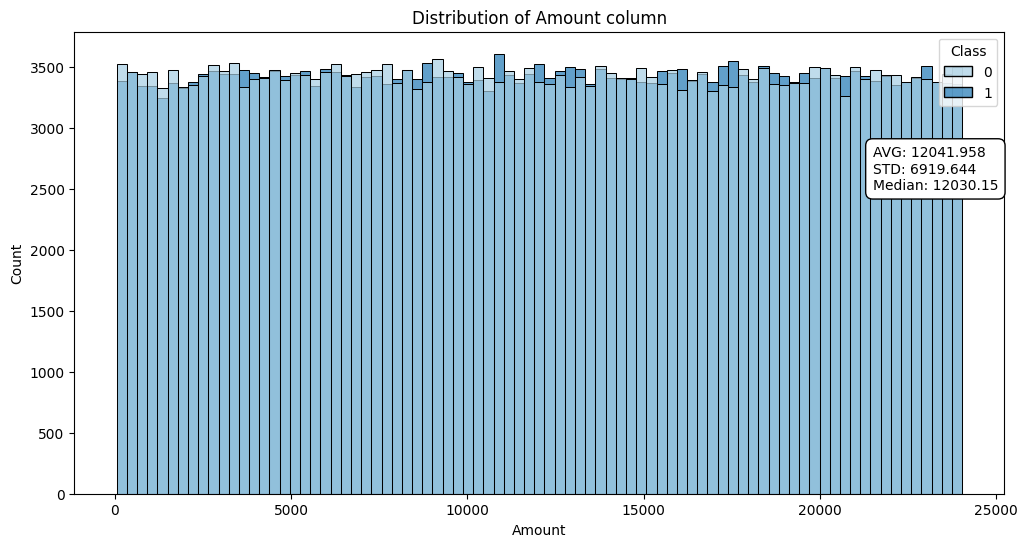

In [160]:
# making bbox dictionary for texts
bbox_dict = dict(facecolor = 'white', edgecolor = 'black', boxstyle = 'round,pad=0.5')
# looking through amount column
plt.figure(figsize = (12,6))
label_text = f'AVG: {round(data.Amount.mean(), 3)}\nSTD: {round(data.Amount.std(), 3)}\nMedian: {round(data.Amount.median(), 3)}'
sns.histplot(data = data, x = 'Amount', palette = 'Paired', hue = 'Class', alpha = 0.7)
plt.text(x = 21500, y = 2500, fontsize = 10, s =  label_text, bbox = bbox_dict)
plt.title('Distribution of Amount column')
plt.show();

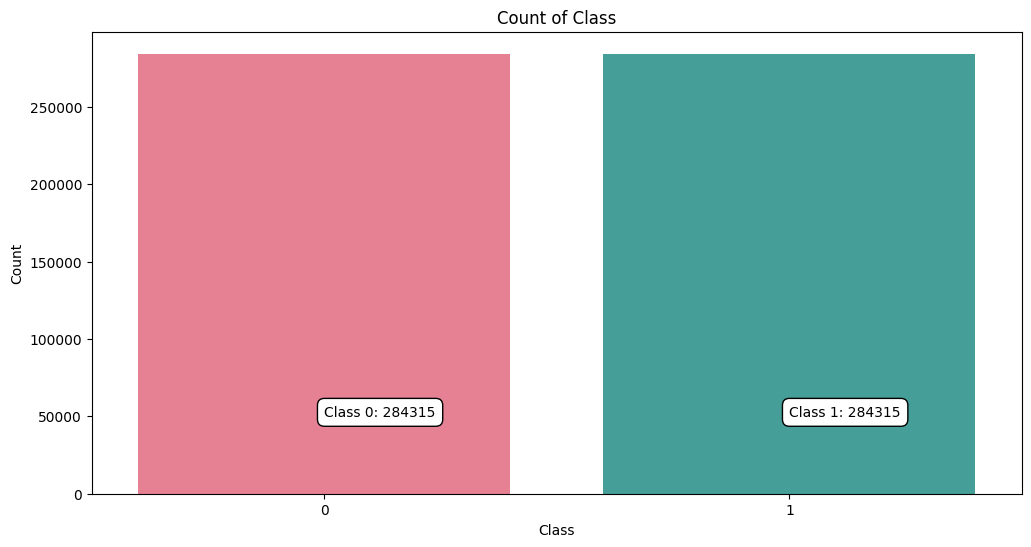

In [109]:
# looking through class
count_0 = data[data.Class == 0]['Class'].count()
count_1 = data[data.Class == 1]['Class'].count()
plt.figure(figsize = (12,6))
sns.countplot(data = data, x = 'Class', palette = 'husl')
plt.text(x = 0, y = 50000, s = f'Class 0: {count_0}', bbox = bbox_dict)
plt.text(x = 1, y = 50000, s = f'Class 1: {count_1}', bbox = bbox_dict)
plt.title('Count of Class')
plt.ylabel('Count')
plt.show();

STD of Amount feature is too high.

Class is balanced, which is very good.

Max of Amount feature: 24039.93
Min of Amount feature: 50.01
Above 24000 Amount values data split shape: (936, 30)
Above 100 Amount values data split shape: (1190, 30)


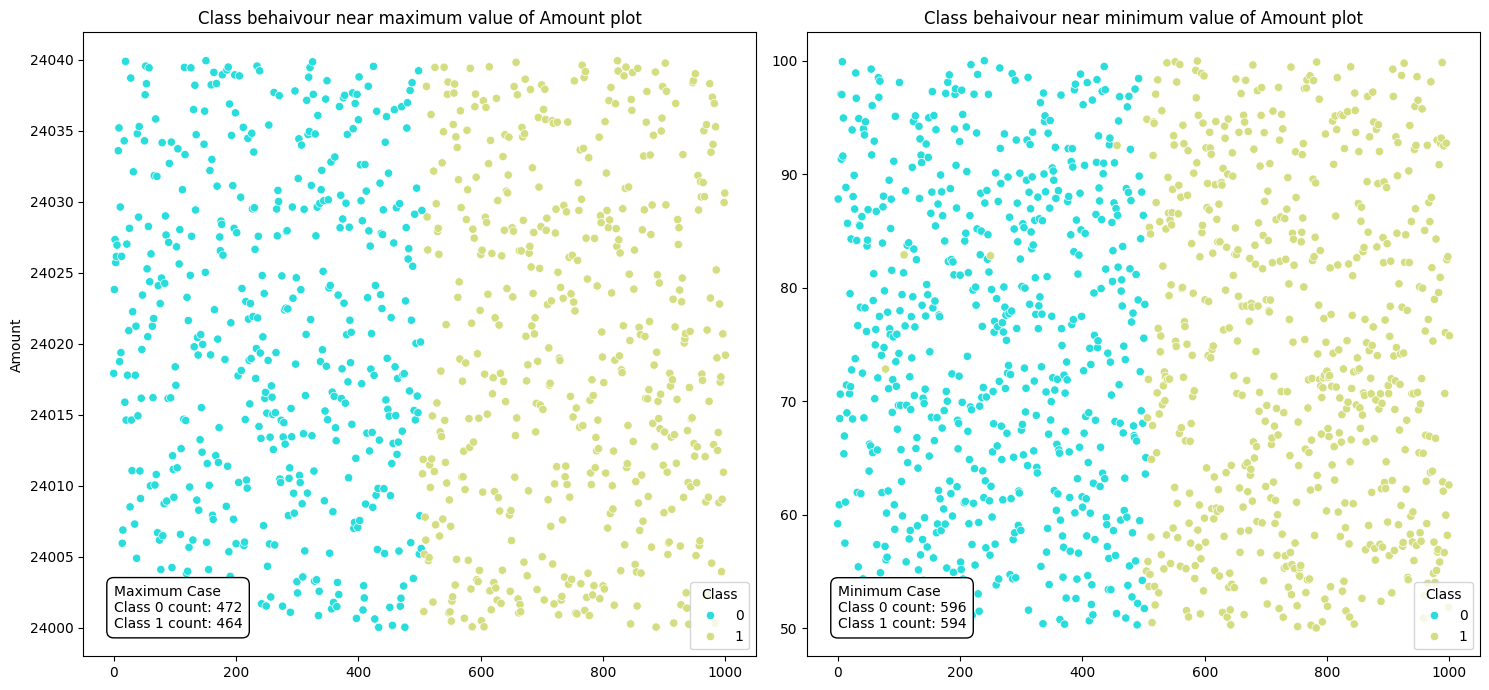

In [155]:
# analysis of part of data where Amount values are near features maximum and minimum values
max_of_amount = data.Amount.max()
min_of_amount = data.Amount.min()
print('Max of Amount feature: {0}'.format(max_of_amount))
print('Min of Amount feature: {0}'.format(min_of_amount))
near_max_am = data[data.Amount >= 24000]
near_min_am = data[data.Amount <= 100]
print(f'Above 24000 Amount values data split shape: {near_max_am.shape}')
print(f'Above 100 Amount values data split shape: {near_min_am.shape}')
# counting classes in this split
count_0_max = near_max_am[near_max_am.Class == 0]['Class'].count()
count_1_max = near_max_am[near_max_am.Class == 1]['Class'].count()
count_0_min = near_min_am[near_min_am.Class == 0]['Class'].count()
count_1_min = near_min_am[near_min_am.Class == 1]['Class'].count()
# plots for looking is class imbalanced in this split
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.scatterplot(data = near_max_am, x = np.linspace(0, 1000, near_max_am.shape[0]), y = 'Amount', hue = 'Class', palette = 'rainbow')
plt.text(x = 0, y = 24000, s = f'Maximum Case\nClass 0 count: {count_0_max}\nClass 1 count: {count_1_max}', bbox = bbox_dict)
plt.title('Class behaivour near maximum value of Amount plot')
plt.legend(loc = 'lower right', title = 'Class')
plt.subplot(1,2,2)
sns.scatterplot(data = near_min_am, x = np.linspace(0, 1000, near_min_am.shape[0]), y = 'Amount', hue = 'Class', palette = 'rainbow')
plt.text(x = 0, y = 50, s = f'Minimum Case\nClass 0 count: {count_0_min}\nClass 1 count: {count_1_min}', bbox = bbox_dict)
plt.title('Class behaivour near minimum value of Amount plot')
plt.ylabel('')
plt.legend(loc = 'lower right', title = 'Class')
plt.tight_layout();
plt.show();

Behaivour of class in 2 cases is primiarly the same.It's obvious, due the countplot above.You can see some cases of Class 1 in first of half(where most points are belonging to Class 0) of minimum case.

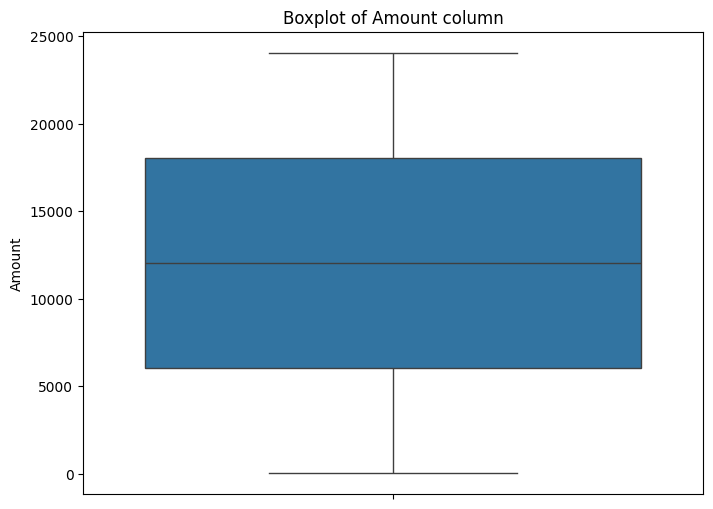

In [326]:
# outlier detection of amount
plt.figure(figsize = (8,6))
sns.boxplot(data = data, y = 'Amount')
plt.title('Boxplot of Amount column')
plt.show();

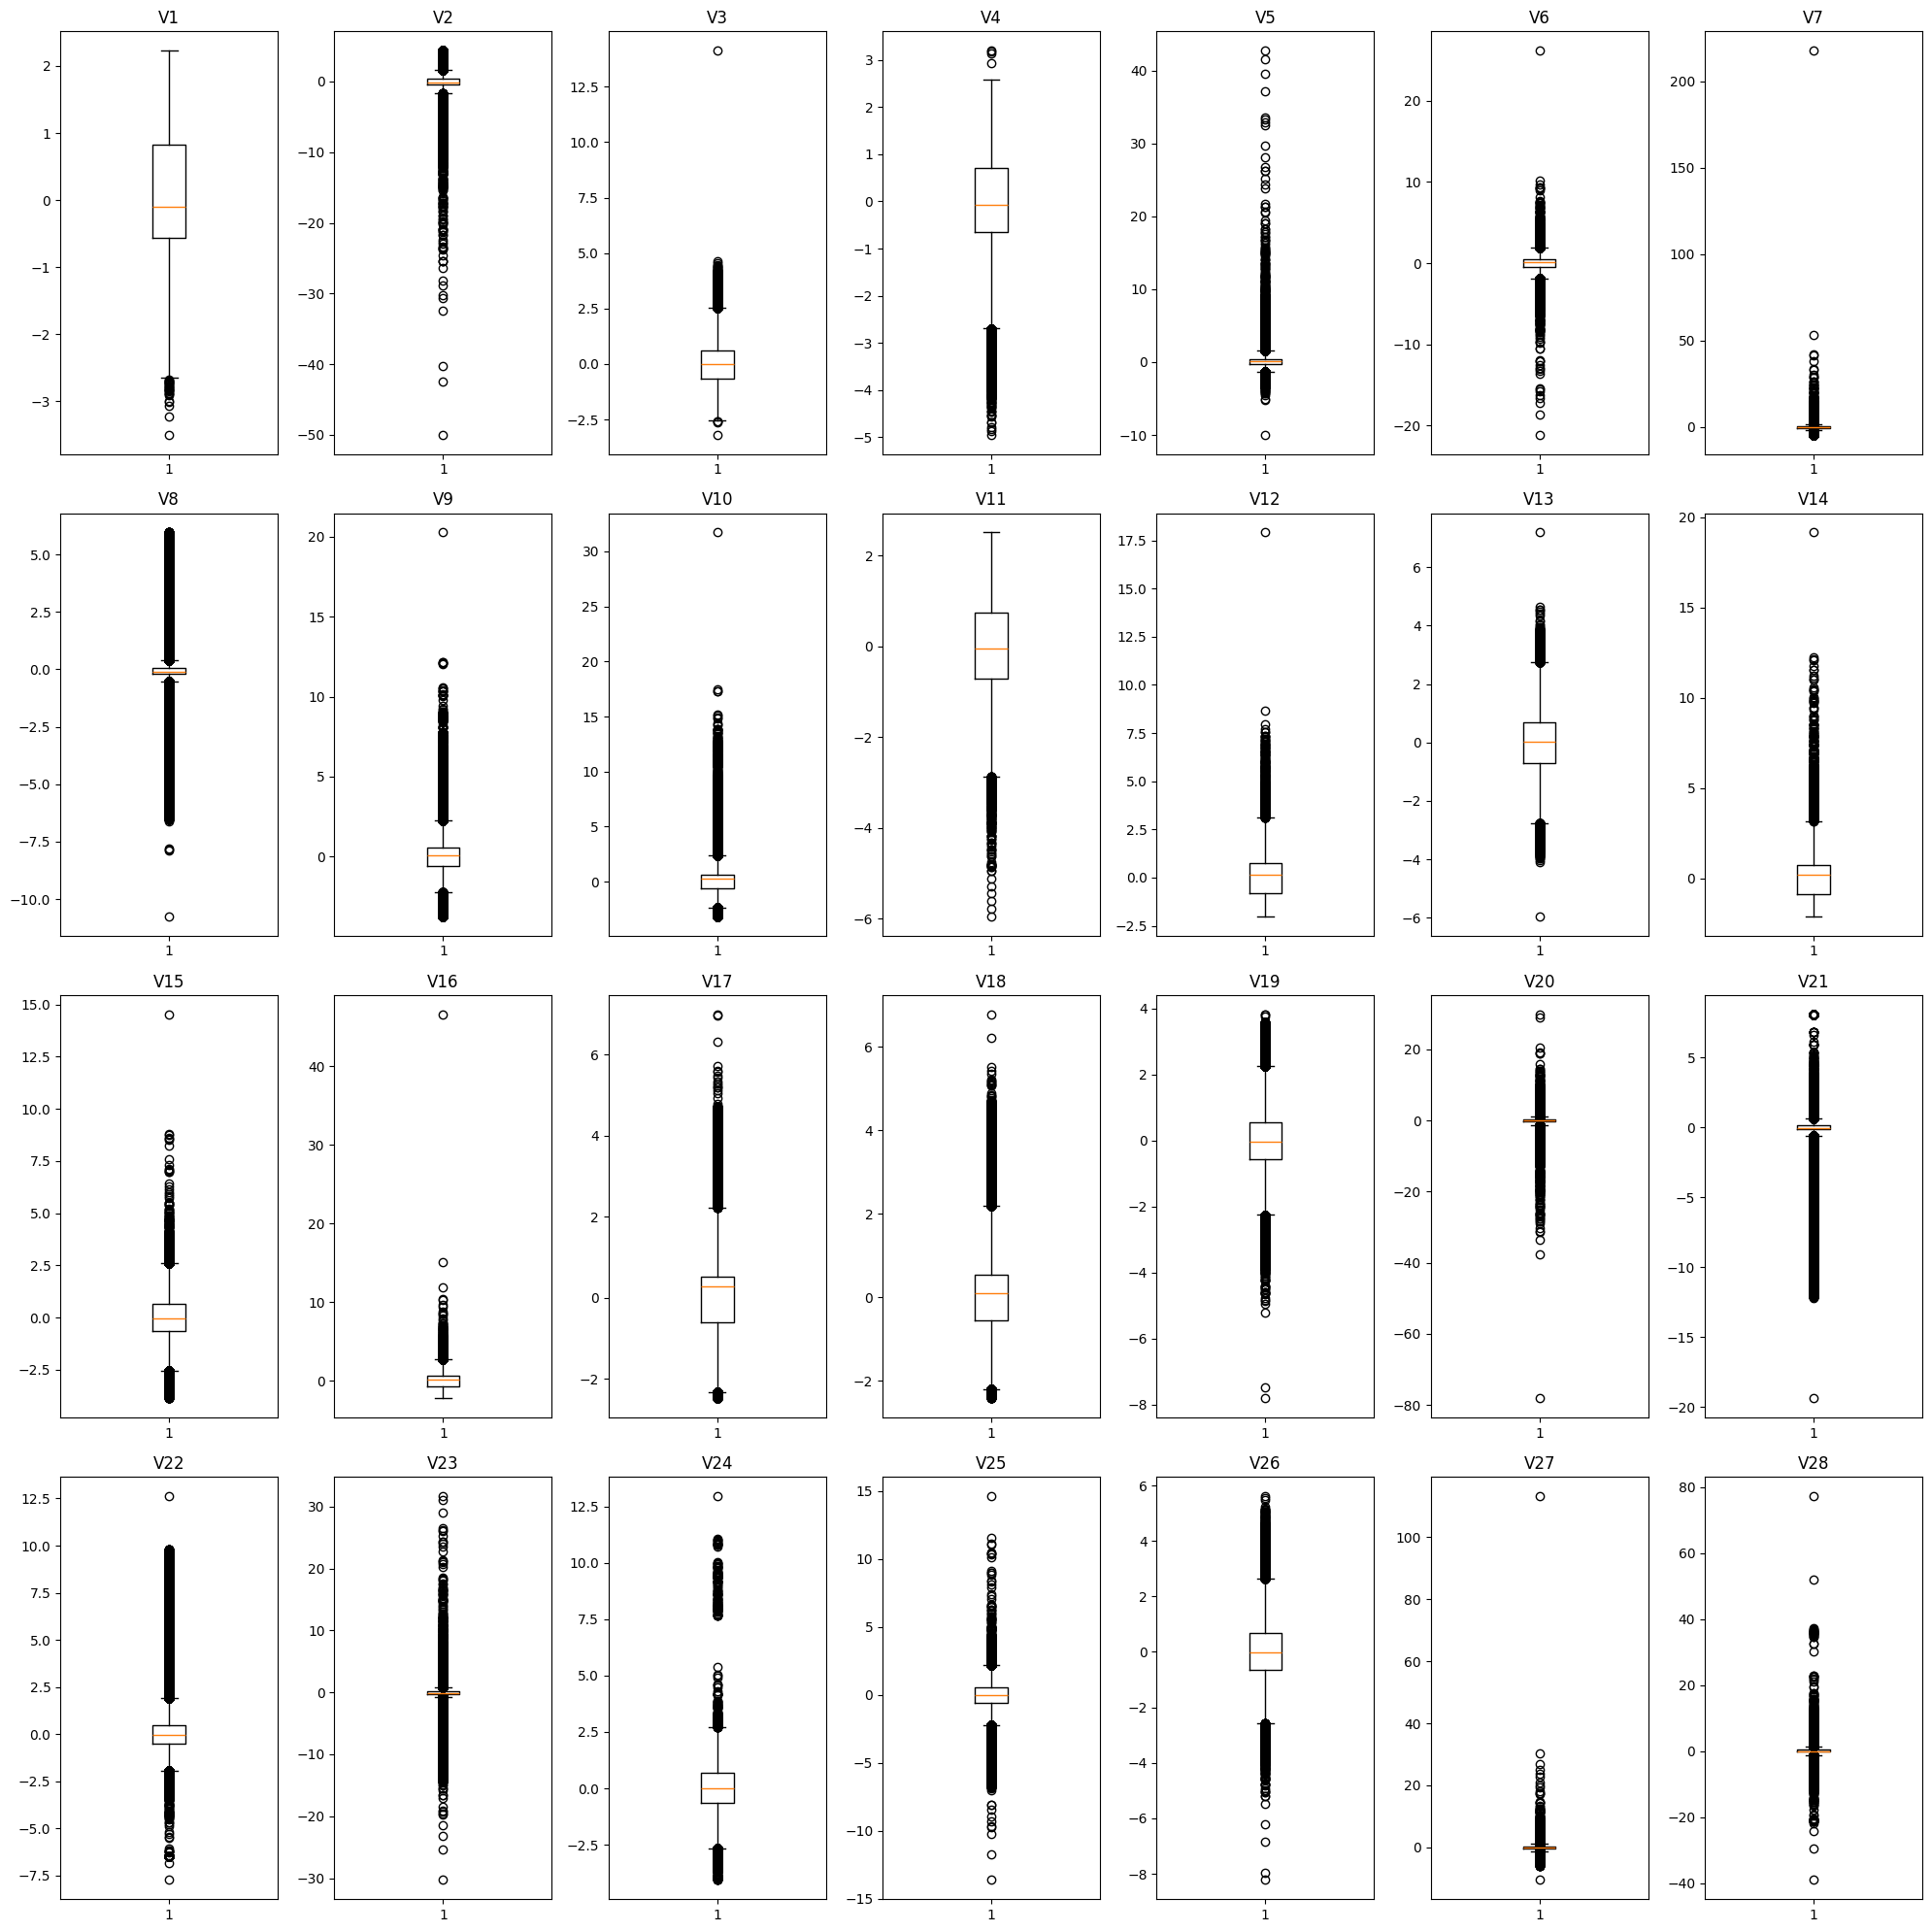

In [183]:
# looking to V1-28 columns outliers
v_data = data.iloc[:, :28]
fig, axes = plt.subplots(nrows = 4, ncols = 7, figsize = (20,20))
for ax_i, col in enumerate(v_data.columns):
    axes.flatten()[ax_i].boxplot(x = v_data[col])
    axes.flatten()[ax_i].set_title(f'{col}')
plt.tight_layout()
plt.show();

We have ambigous data out from boxes, let's count the V1-28 data column values under boxes.

In [373]:
# using some formulas from boxplots to count quantity of outliers
outliers_count = pd.DataFrame(columns = ['Column', 'Count'])
for col in v_data.columns:
    q1 = np.quantile(v_data[col].values, 0.25)
    q3 = np.quantile(v_data[col].values, 0.75)  
    iqr = q3 - q1 # IQR range is length of box
    minimum = q1 - 1.5 * iqr
    maximum = q3 + 1.5 * iqr
    count_min = v_data[v_data[col] < minimum][col].count()
    count_max = v_data[v_data[col] > maximum][col].count()
    one_row = pd.DataFrame({'Column':[col], 'Count':[count_min + count_max]})
    outliers_count = pd.concat([outliers_count, one_row], axis = 0)
# pivot table for outputing it in single-row dataframe
outliers_count_pivot = outliers_count.pivot_table(index = None, columns = 'Column', values = 'Count')
outliers_count_pivot = outliers_count_pivot.reindex(columns = outliers_count.Column.values)
display(outliers_count_pivot.iloc[:, :14])
display(outliers_count_pivot.iloc[:, 14:])

Column,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
Count,30.0,43620.0,4300.0,2766.0,71015.0,48854.0,55997.0,93856.0,18939.0,10710.0,709.0,700.0,4197.0,1088.0


Column,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
Count,6780.0,4546.0,14890.0,16676.0,19519.0,65708.0,57138.0,13706.0,72056.0,2029.0,28089.0,6554.0,82235.0,70242.0


We see, that ambigious part in V1-28 columns are considered by boxplots as outliers.However, I will let them stay in our data, due the ambigious values reason.

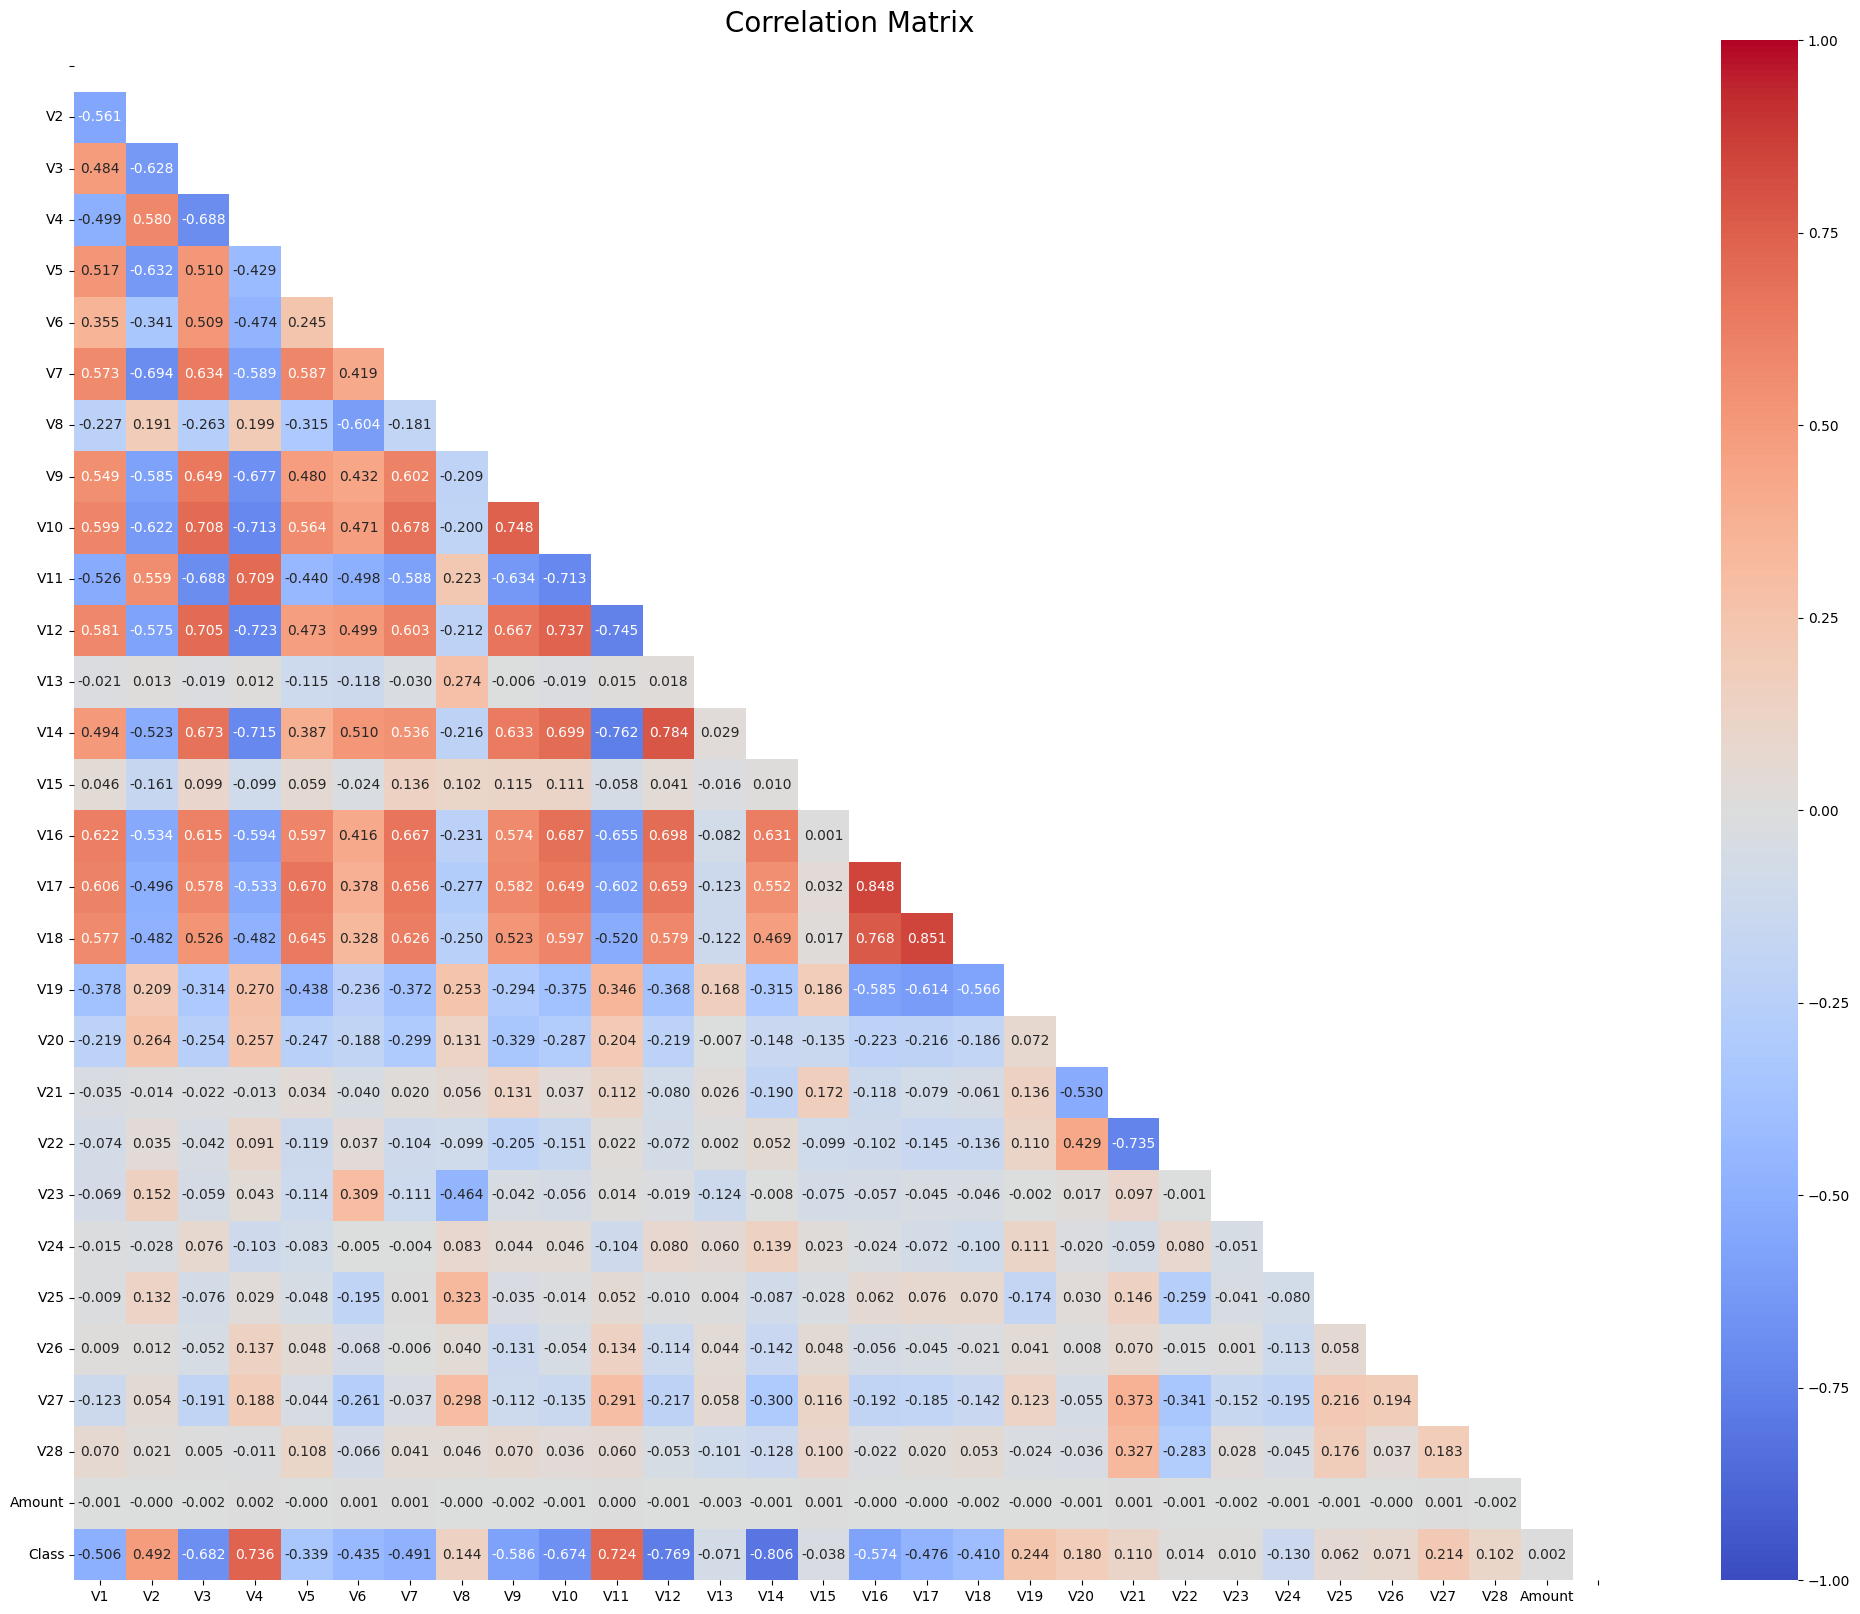

In [374]:
# correlation matrix
plt.figure(figsize = (25,20))
corr_matrix = sns.heatmap(data = data.corr(), cmap = 'coolwarm', annot = True, fmt = '.3f', vmin = -1, vmax = 1,
            mask = np.triu(np.ones_like(data.corr())))
# getting xticks
xtick_labels = [label.get_text() for label in corr_matrix.get_xticklabels()]
xtick_labels[-1] = None
corr_matrix.set_xticklabels(xtick_labels)
# getting yticks
ytick_labels = [label.get_text() for label in corr_matrix.get_yticklabels()]
ytick_labels[0] = None
corr_matrix.set_yticklabels(ytick_labels, rotation = 360)
plt.title('Correlation Matrix', fontsize = 20)
plt.show();

__Data Preparation.__

__Import libraries and packages for scaling and decomposition.__

In [233]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [197]:
# define X and y
X = data.iloc[:, :29]
y = data.iloc[:, -1]

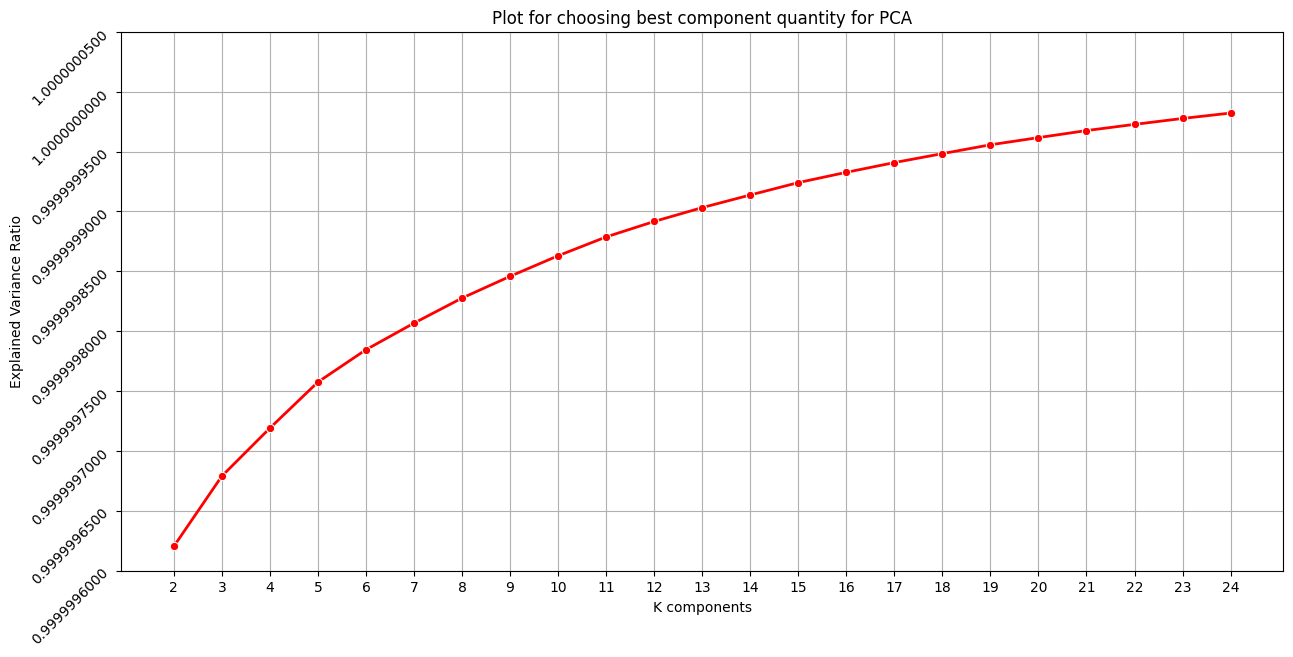

In [220]:
# Principal Component Analysis
# define components quantity as K
K = range(2,25)
variance_list = []
for k in K:
    pca = PCA(n_components = k)
    X_pca = pca.fit_transform(X)
    variance_list.append(np.sum(pca.explained_variance_ratio_))
variance_array = np.array(variance_list)
# ploting variance ratio to K components
plt.figure(figsize = (15,7))
sns.lineplot(x = K, y = variance_array, lw = 2, marker = 'o', color = 'red')
plt.xlabel('K components')
plt.ylabel('Explained Variance Ratio')
plt.title('Plot for choosing best component quantity for PCA')
# fixing ticks for supress output and get more x ticks
ticks = plt.yticks()[0] # getting locations of y-ticks
new_ticks = ['%.10f' % tick for tick in ticks]
plt.yticks(ticks, new_ticks, rotation = 45)
plt.xticks(K)
plt.grid(True)
plt.show();

We can drop 11 columns from our data.It is pretty good result.

In [228]:
# doing PCA with 18 components
pca = PCA(n_components = 18)
X_dec = pca.fit_transform(X)
X_dec = pd.DataFrame(data = X_dec, columns = range(18))
print(f'X shape after PCA: {X_dec.shape}')
X_dec.head()

X shape after PCA: (568630, 18)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,5940.142365,2.193067,-0.166146,0.265322,0.911971,0.482688,-1.336827,-0.806713,-0.763161,-1.117420,0.234869,0.042612,-0.288729,1.060222,0.093920,0.002385,-0.342080,0.184579
1,-5510.587636,2.082929,0.356905,0.167358,0.019457,0.131157,0.618161,-0.510472,-0.289121,-0.325592,-0.668054,-0.259010,-0.061032,-0.399342,0.252583,-0.357970,-0.108937,-0.284140
2,-9528.417635,2.279193,-0.519074,-0.365173,0.379966,1.153955,-0.171441,-1.219552,-1.531670,-1.227454,-1.806086,0.423734,-0.972357,1.715700,0.775333,-1.086164,0.768378,1.114042
3,-6657.517636,2.692145,0.109739,-0.258587,-1.142152,-0.675950,1.143816,-0.314816,-1.469792,0.379314,0.006739,-0.597286,0.344839,1.572213,0.366148,0.279589,-0.239421,-0.144173
4,2237.012364,2.049822,-0.355019,0.937366,0.978895,0.594746,0.903840,-1.247914,0.615464,0.605981,-0.314677,-0.286604,-0.570254,0.841635,-0.025880,0.360531,-0.080726,0.144414


In [229]:
# check the description of columns in X after PCA
X_dec.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05
mean,-2.792049e-12,2.910997e-16,-4.798347e-18,-2.799036e-18,8.796970e-18,3.798691e-17,-4.578423e-17,2.978974e-17,9.321789e-18,-1.149604e-17,-2.879008e-17,6.297831e-18,-1.239573e-17,3.898657e-17,7.457431e-17,7.388705e-17,-7.997245e-18,3.858671e-17
std,6.919644e+03,3.134156e+00,1.676225e+00,1.385464e+00,1.356659e+00,1.137180e+00,1.031104e+00,1.000561e+00,9.326320e-01,9.065637e-01,8.679324e-01,7.862486e-01,7.441387e-01,7.102526e-01,7.038813e-01,6.408708e-01,6.240962e-01,5.981550e-01
min,-1.199195e+04,-7.400273e+00,-2.810425e+01,-1.421912e+01,-8.971155e+00,-7.446340e+00,-4.021581e+01,-1.786299e+01,-1.621447e+01,-3.873560e+01,-2.211390e+01,-1.450885e+01,-1.413132e+01,-2.655767e+00,-3.318952e+01,-1.610183e+01,-2.135155e+01,-1.663750e+01
25%,-5.987065e+03,-1.973400e+00,-4.101728e-01,-4.334092e-01,-5.060865e-01,-5.710348e-01,-6.782011e-01,-5.365972e-01,-6.283670e-01,-5.736530e-01,-5.756467e-01,-4.134547e-01,-4.273270e-01,-3.748707e-01,-2.872869e-01,-3.860060e-01,-3.219536e-01,-3.038899e-01
50%,-1.180763e+01,1.909006e+00,-9.058736e-03,5.069892e-02,1.939675e-01,3.311905e-02,-3.615545e-02,-2.479909e-02,8.194434e-03,-8.237833e-03,-7.939814e-03,3.889206e-03,5.205038e-02,3.219477e-02,1.812083e-02,1.991112e-03,8.475320e-03,-1.384217e-02
75%,5.994372e+03,2.285154e+00,4.864414e-01,5.220734e-01,7.717500e-01,6.324457e-01,6.115067e-01,4.714945e-01,6.445917e-01,5.612080e-01,5.610746e-01,3.851333e-01,4.636870e-01,4.576174e-01,3.465012e-01,3.736092e-01,3.186246e-01,2.620850e-01
max,1.199797e+04,7.022799e+01,6.290269e+01,1.941499e+01,1.227591e+01,6.299961e+01,4.040565e+01,2.225112e+01,2.322254e+01,4.590084e+01,4.345883e+01,1.140794e+02,3.220329e+01,2.913386e+01,9.124827e+01,1.116972e+02,3.828573e+01,5.864401e+01


In [232]:
# scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dec)
X_scaled = pd.DataFrame(data = X_scaled, columns = range(18))
X_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05
mean,3.798691e-17,1.380964e-14,-3.156913e-16,-1.928136e-15,-1.990714e-15,2.548122e-16,7.041574e-16,3.238884e-16,-5.603070e-17,4.706879e-16,1.297553e-16,-5.671046e-16,-1.133909e-15,5.658051e-17,-5.807999e-17,7.138291e-16,5.304173e-16,6.435783e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.733031e+00,-2.361171e+00,-1.676641e+01,-1.026309e+01,-6.612686e+00,-6.548083e+00,-3.900269e+01,-1.785298e+01,-1.738572e+01,-4.272798e+01,-2.547885e+01,-1.845328e+01,-1.899018e+01,-3.739190e+00,-4.715220e+01,-2.512495e+01,-3.421198e+01,-2.781473e+01
25%,-8.652280e-01,-6.296437e-01,-2.447006e-01,-3.128263e-01,-3.730391e-01,-5.021506e-01,-6.577430e-01,-5.362965e-01,-6.737573e-01,-6.327780e-01,-6.632397e-01,-5.258579e-01,-5.742577e-01,-5.277995e-01,-4.081472e-01,-6.023154e-01,-5.158722e-01,-5.080458e-01
50%,-1.706395e-03,6.090977e-01,-5.404253e-03,3.659350e-02,1.429745e-01,2.912388e-02,-3.506481e-02,-2.478520e-02,8.786361e-03,-9.086885e-03,-9.147972e-03,4.946540e-03,6.994722e-02,4.532867e-02,2.574417e-02,3.106888e-03,1.358016e-02,-2.314147e-02
75%,8.662841e-01,7.291135e-01,2.902008e-01,3.768225e-01,5.688610e-01,5.561534e-01,5.930605e-01,4.712303e-01,6.911540e-01,6.190503e-01,6.464502e-01,4.898370e-01,6.231196e-01,6.443029e-01,4.922727e-01,5.829717e-01,5.105380e-01,4.381560e-01
max,1.733902e+00,2.240732e+01,3.752644e+01,1.401337e+01,9.048641e+00,5.539993e+01,3.918680e+01,2.223865e+01,2.490003e+01,5.063173e+01,5.007172e+01,1.450935e+02,4.327596e+01,4.101905e+01,1.296360e+02,1.742898e+02,6.134592e+01,9.804157e+01


In [236]:
# define train-test-validation splits
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42, stratify = y_train)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (409413, 18)
X_test shape: (113726, 18)
X_val shape: (45491, 18)
y_train shape: (409413,)
y_test shape: (113726,)
y_val shape: (45491,)


__Model Buildings.__

__Import models from Scikit-Learn.__

In [245]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

We will do some competition across Scikit-Learn models via hyperparameter tuning, and the bests will be deployed.

We will use cross-validation technique to compute the scores.

In [241]:
# first group:'weak' models
# first model - Logistic Regression
log_reg_params = {
    'penalty':['l1', 'l2', 'elasticnet', None],
    'C':[0.0001, 0.001, 0.01, 0.1, 1]
}
log_reg_t = GridSearchCV(LogisticRegression(), log_reg_params, cv = 5, verbose = 0, n_jobs = -1)
log_reg_t.fit(X_val, y_val)
log_reg_score = pd.DataFrame({'Model':'Logistic Regression', 'Score':[log_reg_t.best_score_]})

# second model - Decision Tree
d_tree_params = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['random', 'best'],
    'max_depth':[3,4,5,6,7,8]
}
d_tree_t = GridSearchCV(DecisionTreeClassifier(), d_tree_params, cv = 5, verbose = 0, n_jobs = -1)
d_tree_t.fit(X_val, y_val)
d_tree_score = pd.DataFrame({'Model':'Decision Tree', 'Score':[d_tree_t.best_score_]})

# third model - KNN
knn_params = {
    'n_neighbors':[3,5,7,9],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric':['euclidean', 'minkowski', 'manhattan']
}
knn_t = GridSearchCV(KNeighborsClassifier(), knn_params, cv = 5, verbose = 0, n_jobs = -1)
knn_t.fit(X_val, y_val)
knn_score = pd.DataFrame({'Model':'KNN', 'Score':[knn_t.best_score_]})

first_group = pd.concat([pd.concat([log_reg_score, d_tree_score], axis = 0), knn_score], axis = 0)
display(first_group)

/home/armh12/miniconda3/envs/TF/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/armh12/miniconda3/envs/TF/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/armh12/miniconda3/envs/TF/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/armh12/miniconda3/envs/TF/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/armh12/miniconda3/envs/TF/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/armh12/miniconda3/envs/T

,Model,Score
0,Logistic Regression,0.959508
0,Decision Tree,0.970016
0,KNN,0.989734


In [246]:
# output params
print(f'Logistic Regression best hyper-parameters: {log_reg_t.best_params_}')
print(f'Decision Tree best hyper-parameters: {d_tree_t.best_params_}')
print(f'KNN best hyper-parameters: {knn_t.best_params_}')

Logistic Regression best hyper-parameters: {'C': 0.0001, 'penalty': None}
Decision Tree best hyper-parameters: {'criterion': 'gini', 'max_depth': 8, 'splitter': 'best'}
KNN best hyper-parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Really nice results for first group of models, let's go further to second group - Support Vector and Ensemble models, which are considered better comparing to first group of models.

In [ ]:
# second group - SVC, RandomForest, AdaBoost and GradientBoost
# fourth model - Support Vector Classifier
svc_params = {
    'C':[0.0001, 0.001, 0.01, 0.1, 1],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[2,3],
    'gamma':['scale', 'auto']
}
svc_t = GridSearchCV(SVC(), svc_params, cv = 5, n_jobs = -1, verbose = 0)
svc_t.fit(X_val, y_val)
svc_score = pd.DataFrame({'Model':'SVC', 'Score':[svc_t.best_score_]})

# fifth model - Random Forest
rf_params = {
    'n_estimators':[70,80,90,100,110,120,130,140],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[3,4,5,6,7,8]
}
rf_t = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5, n_jobs = -1, verbose = 0)
rf_t.fit(X_val, y_val)
rf_score = pd.DataFrame({'Model':'RandomForest', 'Score':[rf_t.best_score_]})

# sixth model - AdaBoost Classifier
adab_params = {
    'n_estimators':[30,40,50,60,70,80,90,100],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1],
}
adab_t = GridSearchCV(AdaBoostClassifier(), adab_params, cv = 5, n_jobs = -1, verbose = 0)
adab_t.fit(X_val, y_val)
adab_score = pd.DataFrame({'Model':'AdaBoost', 'Score':[adab_t.best_score_]})

# seventh model - Gradient Boost
grad_params = {
    'loss':['log_loss', 'exponential'],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1],
    'n_estimators':[10,20,30,40,50,60,70,80,90,100],
}
grad_t = GridSearchCV(GradientBoostingClassifier(), grad_params, cv = 5, n_jobs = -1, verbose = 0)
grad_t.fit(X_val, y_val)
grad_score = pd.DataFrame({'Model':'Gradient Boost', 'Score':[grad_t.best_score_]})

In [249]:
# concating second group results
svc_rf = pd.concat([svc_score, rf_score], axis = 0)
adab_grad = pd.concat([adab_score, grad_score], axis = 0)
second_group = pd.concat([svc_rf, adab_grad], axis = 0)
display(second_group)
print(f'SVC best hyper-parameters: {svc_t.best_params_}')
print(f'Random Forest best hyper-parameters: {rf_t.best_params_}')
print(f'AdaBoost best hyper-parameters: {adab_t.best_params_}')
print(f'Gradient Boost best hyper-parameters: {grad_t.best_params_}')

,Model,Score
0,SVC,0.986349
0,RandomForest,0.970676
0,AdaBoost,0.968455
0,Gradient Boost,0.989295


SVC best hyper-parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Random Forest best hyper-parameters: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 90}
AdaBoost best hyper-parameters: {'learning_rate': 1, 'n_estimators': 100}
Gradient Boost best hyper-parameters: {'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 100}


Pretty nice results too.AdaBoost performed not so well as I expected, however it's quite above average.

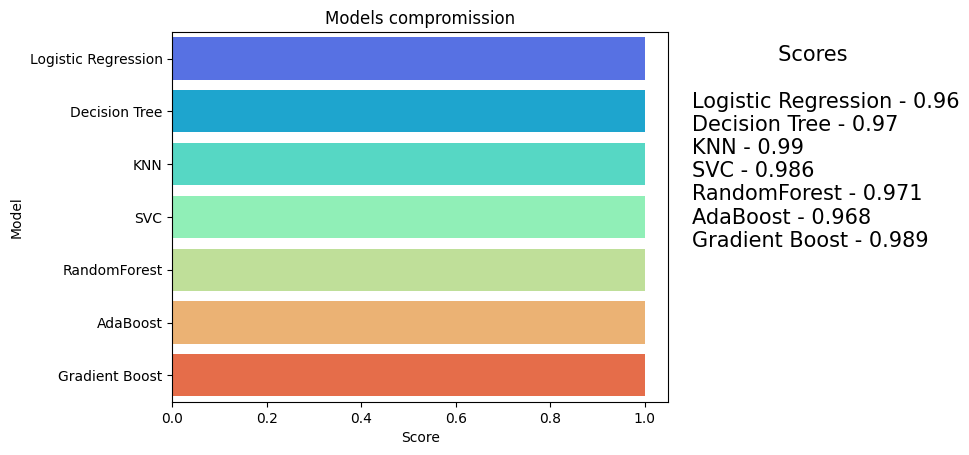

In [291]:
# concat two groups
models_stats = pd.concat([first_group, second_group], axis = 0)
models_stats['index'] = range(models_stats.shape[0])
models_stats.set_index('index', inplace = True)
# making results text for plot
plot_text = 'Scores\n'.rjust(20) + '\n'
for i in range(models_stats.shape[0]):
    text = f'{models_stats.iloc[i].Model} - {round(models_stats.iloc[i].Score, 3)}\n'
    plot_text += text
# plot
sns.countplot(data = models_stats, y = 'Model', palette = 'rainbow')
plt.title('Models comparison')
plt.xlabel('Score')
plt.text(x = 1.1, y = 4, s = plot_text, bbox = {'facecolor': 'white', 'edgecolor': 'white'}, fontsize = 15)
plt.show();

Competition winner is KNN, second place for Gradient Boost.All models performed well.So let's finally train on both of them and make predictions.

In [293]:
# train knn
knn = KNeighborsClassifier(**knn_t.best_params_)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [321]:
# function for evaluation of models
def classification_evaluation(y_true: pd.Series, y_pred: np.array):
    print(classification_report(y_true, y_pred))
    plt.figure(figsize = (20,10))
    plt.subplot(1,2,1)
    sns.heatmap(data = confusion_matrix(y_true, y_pred), cmap = 'Blues', annot = True, fmt = '.3f', cbar = False)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confussion Matrix')
    plt.subplot(1,2,2)
    plt.hist([y_true, y_pred], color = ['blue', 'green'], label = ['Class 0', 'Class 1'])
    plt.legend(fontsize = 15)
    plt.text(x = 0.45, y = 30000, s = '<- Actual\n\nPredicted ->', fontsize = 15, bbox = bbox_dict)
    plt.title('Count of Classes - Predicted and Actual')
    plt.show();

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.99      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



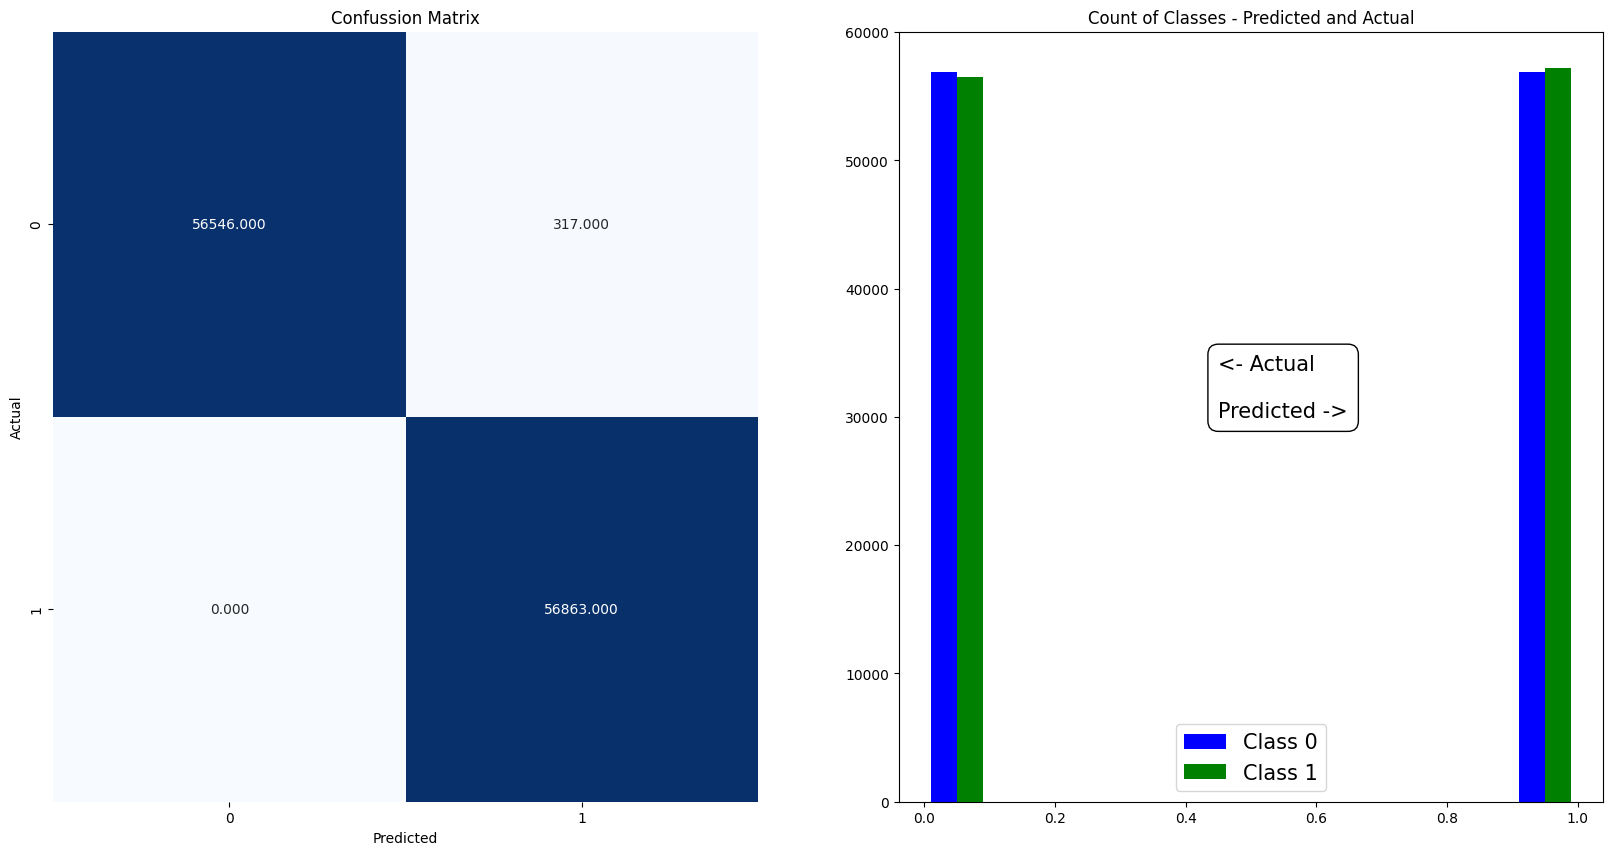

In [322]:
# KNN evaluation
classification_evaluation(y_test, knn_pred)

In [320]:
# Gradient Boosting training
gb = GradientBoostingClassifier(**{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 100})
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56863
           1       0.99      0.99      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



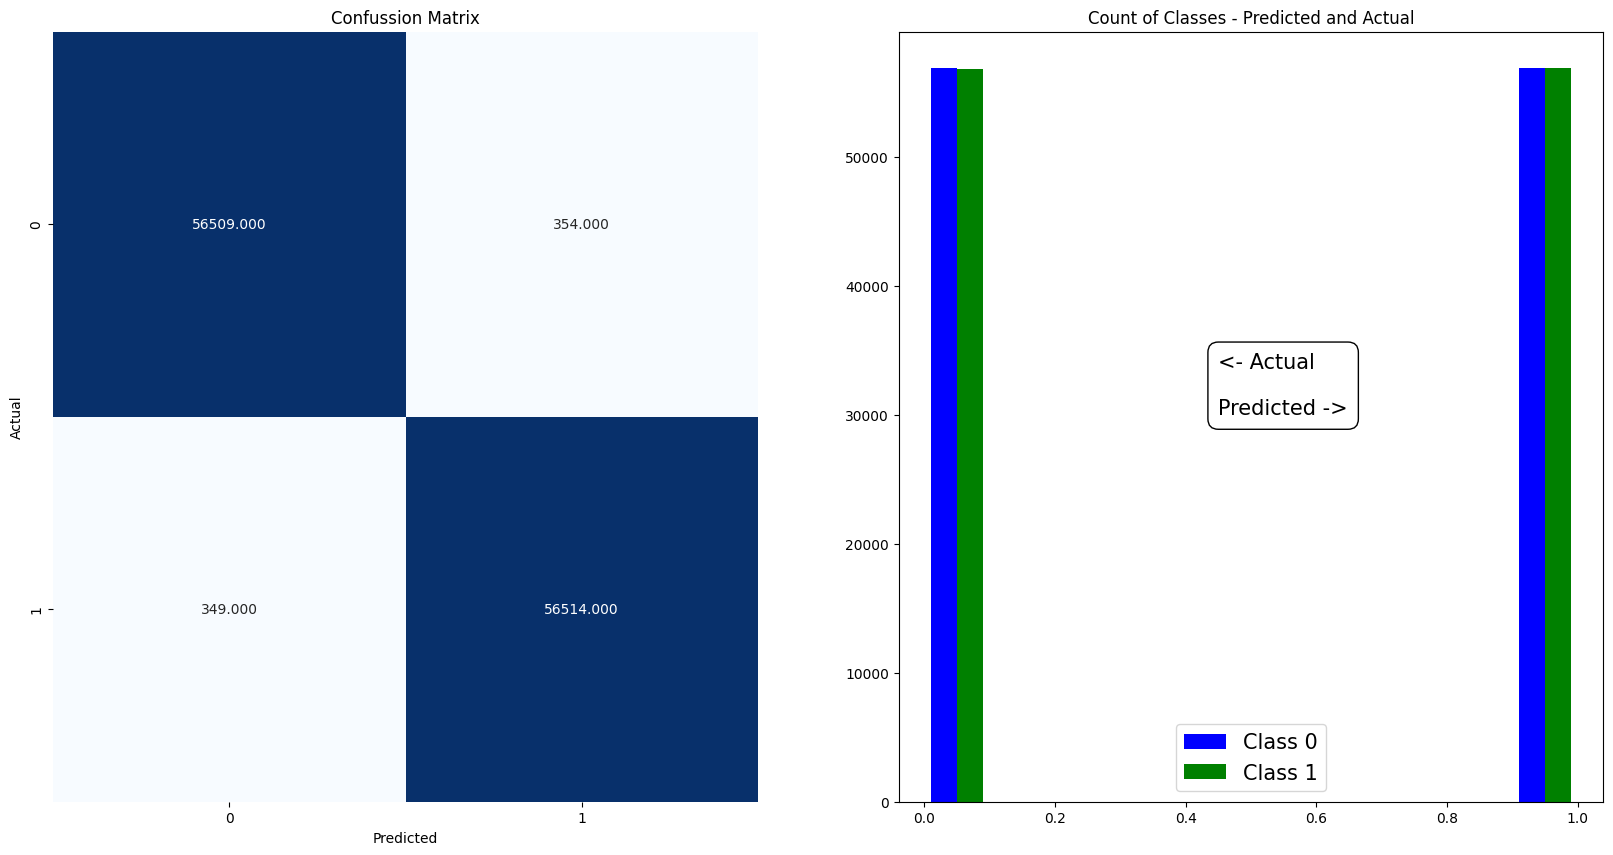

In [323]:
# Gradient Boost evaluation
classification_evaluation(y_test, gb_pred)

After training results, the best model is KNeighborsClassifier.For this dataset, all the tested models are suitable.